# Notebbook #1 Exploring the 


In [1]:
import pandas as pd
import numpy as np

### IMPORT data

In [2]:
from merge_years.import_data import get_full_data

In [3]:
full_data = get_full_data('../raw_data')

### *** LAST 4 GAMES FUNCTION ***

input a feature and get a summary of that features in the last 4 games (av and values)

In [4]:
def summary(player, features, games = 4):
    features[0:0] = ['name', 'GW', 'kickoff_time']
    df = full_data[full_data['name'] == player]
    df = df[features].tail(games)
    df.loc['mean'] = df.mean()
    return df

summary("paul pogba", ["minutes", "value"], 7)

,name,GW,kickoff_time,minutes,value
89073,paul pogba,32.0,15:00:00,90.000000,76.0
89074,paul pogba,33.0,13:00:00,14.000000,76.0
89075,paul pogba,35.0,13:05:00,90.000000,76.0
89076,paul pogba,35.0,17:00:00,0.000000,76.0
89077,paul pogba,35.0,19:15:00,90.000000,76.0
89078,paul pogba,37.0,17:00:00,90.000000,76.0
89079,paul pogba,38.0,15:00:00,0.000000,76.0
mean,NaN,35.0,NaN,53.428571,76.0


### Function : player focus 

Lloris, Pogba, Van Dijk

In [80]:
def player_focus(players):
    frames = []
    for player in players:
        player_stats = full_data[full_data["name"] == player]
        frames.append(player_stats)
    return pd.concat(frames) 

In [81]:
players = ["virgil van dijk", "paul pogba", "hugo lloris"]
test_dataset = player_focus(players)
test_dataset.shape

(570, 35)

In [92]:
test_dataset.shape[0]

570

#### bullshit

*** SET THE INDEX ***

In [8]:
test_dataset = test_dataset.set_index(np.linspace(1, test_dataset.shape[0], num=test_dataset.shape[0], dtype=int))

In [9]:
test_dataset[["total_points"]].iloc[[1,2,3]]
test_dataset[["total_points"]].head()

,total_points
1,1
2,1
3,2
4,0
5,7


### SET MOVING AVERAGE for all dataset

#### function

In [114]:
def moving_a(df, points = 'total_points', days = 4):
    
    ### check shape of input df
    print(f"input shape = {df.shape}")
    
    # get a list of all players
    players_list = df.name.unique()
    
    # preparing the list of dataframe of each players with their m_a scores
    # we will conncat these back later to make the output df
    players_df_with_ma = []
    
    ### print how many players are in the df
    print(f"# players = {len(players_list)}")
    
    for player in players_list:
        
        # creating a unique DF for each player
        unique_player_df = df[df["name"] == player]
        
        # adding the moving average for each player
        unique_player_df["moving_a"] = unique_player_df[f'{points}'].rolling(days,closed="left").mean()
        
        #appending each player's DF to the list of players DFs
        players_df_with_ma.append(unique_player_df)
        
    #concatenating players df into the output df
    output = pd.concat(players_df_with_ma)
    
    ### check shape of output df
    print(f"output shape = {output.shape}")
    return output

full_data_ma = moving_a(full_data, days =3)

input shape = (114937, 35)
# players = 1515


<ipython-input-114-f61006fa6b95>:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  unique_player_df["moving_a"] = unique_player_df[f'{points}'].rolling(days,closed="left").mean()


output shape = (114937, 36)


#### Other

*** Number of rows without a moving_a ***

In [108]:
full_data_ma.moving_a.isna().value_counts()

False    108952
True       5985
Name: moving_a, dtype: int64

In [12]:
full_data_ma[full_data_ma["name"] == "paul pogba"][["name", "season", "GW", "total_points", "moving_a"]].head(20)

,name,season,GW,total_points,moving_a
88890,paul pogba,17,1,0,NaN
88891,paul pogba,17,2,3,NaN
88892,paul pogba,17,3,3,NaN
88893,paul pogba,17,4,2,2.00
88894,paul pogba,17,5,1,2.25
88895,paul pogba,17,6,8,3.50
88896,paul pogba,17,7,2,3.25
88897,paul pogba,17,8,3,3.50
88898,paul pogba,17,9,1,3.50
88899,paul pogba,17,10,2,2.00


#### BASELINE SCORE

In [117]:
full_data_ma[["name", "total_points", "moving_a"]].head(5)

,name,total_points,moving_a
0,aaron connolly,1,NaN
1,aaron connolly,1,NaN
2,aaron connolly,1,NaN
3,aaron connolly,1,1.0
4,aaron connolly,13,1.0


In [185]:
full_data_ma["error"] = abs(full_data_ma['total_points'] - full_data_ma["moving_a"])

In [201]:
df_error = full_data_ma[["name", "total_points", "moving_a", "minutes", "error"]].dropna()
error = df_error["error"]
na_count = full_data_ma.shape[0] - error.shape[0]
zero_count = len(error[error == 0])

In [204]:
na_count, zero_count, zero_count + na_count

(4502, 46970, 51472)

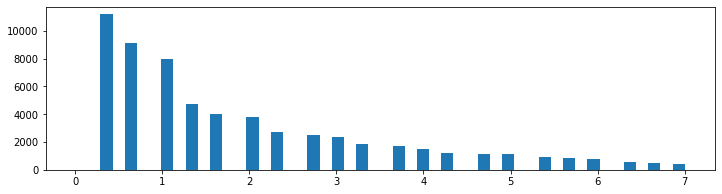

In [190]:
fig = plt.figure(figsize = (12, 3))
plt.hist(error, bins = 50, range=(0.01, 7));

### *** VISUALIZER FUNCTION***

see a player's performance through time

TO DO --> MAKE IT POSSIBLE TO INPUT 1< player !!!

In [13]:
import matplotlib.pyplot as plt

In [88]:
def points_visualizer(player):
    person = player_focus(player)
    fig = plt.figure(figsize = (17, 5))
    x = person["kickoff_date"]
    y = person["total_points"]
    plt.plot(x, y)
    plt.xlabel("Game Weeks")
    plt.ylabel("Total Points")
    plt.title(f"{player}")
    return plt.show()

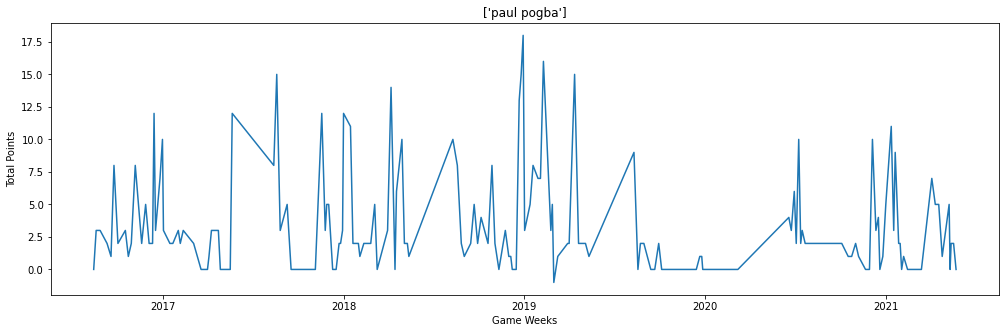

In [91]:
points_visualizer(["paul pogba"])